# Subject: Loan Approval Prediction Using Machine Learning.

## Introduction

Loans are the core business of banks. The main profit comes directly from the loan’s interest. The loan companies grant a loan after an intensive process of verification and validation.

The idea behind this ML project is to build a model for a bank which wants to automate the loan eligibility process based on customer details provided through the application form. These details are gender, martial status, education, employment, dependents, income, loan amount, credit history, etc... We have to automate the process to identify the customer segments, those are eligible for a loan so that we can specifically target these customers. This is a standard supervised classification problem where we have to predict whether a customer is eliglible for that loan or not.

We will be using Python as our programming language for this project along with it libraries for data preprocessing, data visualization, model building, testing and validation. We will prepare the data using Jupyter Notebook  and use various models to predict the target variable.

Before starting with the project lets have a look at our dataset and try to understand what the variables represent and exactly what is our target. Following is the insight of our dataset which we got from kaggle.com.

'Loan_ID':             It is identity number given by the bank which is unique for every customer.

'Gender':              Represents whether the customer is male or female.

'Married':             Represents whether the customer is married or not.

'Dependents':          Represents number of dependents on applicant e.g. spouse and childern.

'Education':           Represents whether applicant is graduated or not.

'Self_Employed':       Represents whether applicant is working or doing business. e.g. 'No' represents working.

'Applicant_Income':    Represents monthly income of applicant in Rs.

'Coapplicant_Income':  Represents monthly income of coapplicant in Rs.

'Loan_Amount':         Represents total loan amount taken by the customer in Rs.

'Loan_Tenure':         Represents total number of months of the loan tenure e.g. '360' reprensents 30 years.

'Credit_History':      Represents whether applicant has taken any loan in past.

'Property_Area':       Represents where the property belongs for which loan was approved.

'Loan_Status':         Represents whether the loan was approved or not. 

### Note: We will not import all libraries together but one by one as and when required. So let's get started..
### Loading the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('loan_approval_1.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Tenure,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,58490,0.0,0,360.0,Yes,Urban,Yes
1,LP001003,Male,Yes,1,Graduate,No,45830,15080.0,1280000,360.0,Yes,Rural,No
2,LP001005,Male,Yes,0,Graduate,Yes,30000,0.0,660000,360.0,Yes,Urban,Yes
3,LP001006,Male,Yes,0,Not Graduate,No,25830,23580.0,1200000,360.0,Yes,Urban,Yes
4,LP001008,Male,No,0,Graduate,No,60000,0.0,1410000,360.0,Yes,Urban,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,29000,0.0,710000,360.0,Yes,Rural,Yes
610,LP002979,Male,Yes,3+,Graduate,No,41060,0.0,400000,180.0,Yes,Rural,Yes
611,LP002983,Male,Yes,1,Graduate,No,80720,2400.0,2530000,360.0,Yes,Urban,Yes
612,LP002984,Male,Yes,2,Graduate,No,75830,0.0,1870000,360.0,Yes,Urban,Yes


- Our dataset has 614 rows and 13 columns.

### Understanding the data

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Tenure', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

- We have 12 independent features and 1 target feature i.e. Loan_Status in the training dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              601 non-null    object 
 2   Married             611 non-null    object 
 3   Dependents          599 non-null    object 
 4   Education           614 non-null    object 
 5   Self_Employed       582 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    int64  
 9   Loan_Tenure         600 non-null    float64
 10  Credit_History      564 non-null    object 
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 62.5+ KB


#### We can see that are three formats of data types: 

- object: categorical features.
- int64: numerical integer features.
- float64: numerical features with decimal values.

In [6]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Tenure
count,614.000000,614.000000,6.140000e+02,600.00000
mean,54034.592834,16212.457980,1.411661e+06,342.00000
std,61090.416734,29262.483692,8.834063e+05,65.12041
min,1500.000000,0.000000,0.000000e+00,12.00000
25%,28775.000000,0.000000,9.800000e+05,360.00000
50%,38125.000000,11885.000000,1.250000e+06,360.00000
75%,57950.000000,22972.500000,1.647500e+06,360.00000
max,810000.000000,416670.000000,7.000000e+06,480.00000


### Perform Exploratory Data Analysis using Data Visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Univariate Analysis:
### Let's visualize the target feature first

In [8]:
df['Loan_Status'].value_counts()

Yes    422
No     192
Name: Loan_Status, dtype: int64

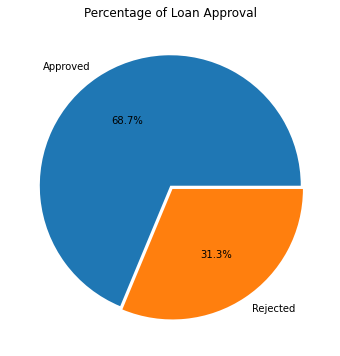

Yes    422
No     192
Name: Loan_Status, dtype: int64

In [9]:
plt.figure(figsize=(6,6))
plt.title("Percentage of Loan Approval")
plt.pie([(df['Loan_Status']=='Yes').sum(),(df['Loan_Status']=='No').sum()], explode=(0,0.03), autopct='%1.1f%%',
        labels=('Approved','Rejected'))
plt.show()
df['Loan_Status'].value_counts()

### Let's visualize the categorical features.

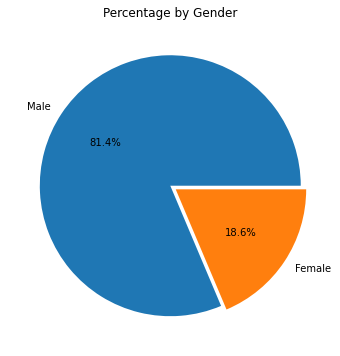

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
plt.figure(figsize=(6,6))
plt.title("Percentage by Gender")
plt.pie([(df['Gender']=='Male').sum(),(df['Gender']=='Female').sum()], explode=(0,0.05), autopct='%1.1f%%',
        labels=('Male','Female'))
plt.show()
df['Gender'].value_counts()

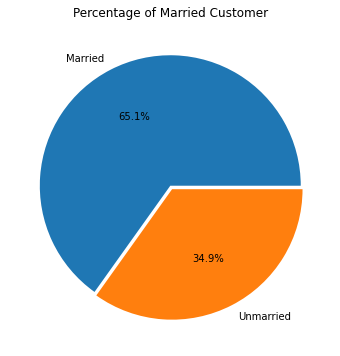

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
plt.figure(figsize=(6,6))
plt.title("Percentage of Married Customer")
plt.pie([(df['Married']=='Yes').sum(),(df['Married']=='No').sum()], explode=(0,0.03), autopct='%1.1f%%',
        labels=('Married','Unmarried'))
plt.show()
df['Married'].value_counts()

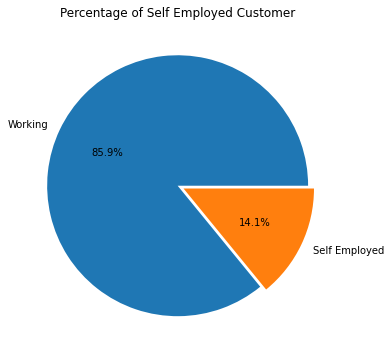

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [12]:
plt.figure(figsize=(6,6))
plt.title("Percentage of Self Employed Customer")
plt.pie([(df['Self_Employed']=='No').sum(),(df['Self_Employed']=='Yes').sum()], explode=(0,0.05), autopct='%1.1f%%',
        labels=('Working','Self Employed'))
plt.show()
df['Self_Employed'].value_counts()

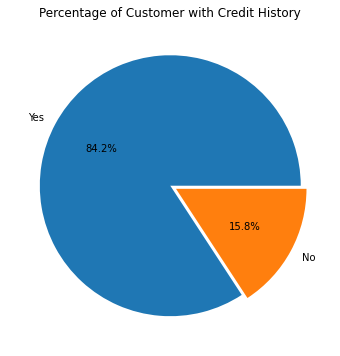

Yes    475
No      89
Name: Credit_History, dtype: int64

In [13]:
plt.figure(figsize=(6,6))
plt.title("Percentage of Customer with Credit History")
plt.pie([(df['Credit_History']=='Yes').sum(),(df['Credit_History']=='No').sum()], explode=(0,0.05), autopct='%1.1f%%',
        labels=('Yes','No'))
plt.show()
df['Credit_History'].value_counts()

#### From the above pie charts we can conclude that:

- 80% of applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% of applicants in the dataset are self-employed.
- Around 85% of applicants have repaid their doubts.

### Let's visualize the ordinal features.

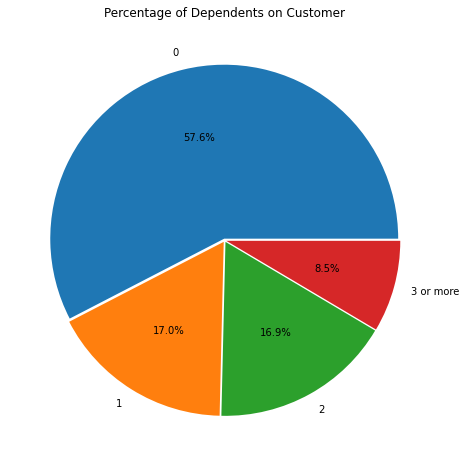

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [14]:
plt.figure(figsize=(8,8))
plt.title("Percentage of Dependents on Customer")
plt.pie([(df['Dependents']=='0').sum(),(df['Dependents']=='1').sum(),(df['Dependents']=='2').sum(),(df['Dependents']=='3+').sum()], 
        explode=(0.01,0.01,0.01,0.01), autopct='%1.1f%%', labels=('0','1','2','3 or more'))
plt.show()
df['Dependents'].value_counts()

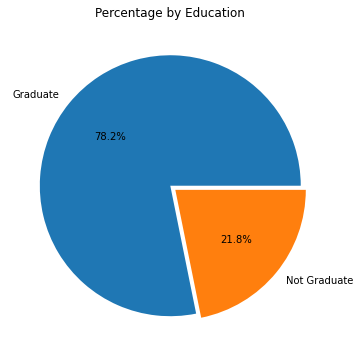

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [15]:
plt.figure(figsize=(6,6))
plt.title("Percentage by Education")
plt.pie([(df['Education']=='Graduate').sum(),(df['Education']=='Not Graduate').sum()], explode=(0,0.05), autopct='%1.1f%%',
        labels=('Graduate','Not Graduate'))
plt.show()
df['Education'].value_counts()

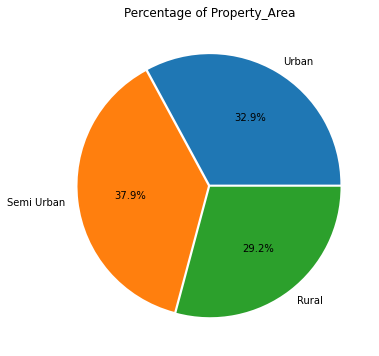

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [16]:
plt.figure(figsize=(6,6))
plt.title("Percentage of Property_Area")
plt.pie([(df['Property_Area']=='Urban').sum(),(df['Property_Area']=='Semiurban').sum(),(df['Property_Area']=='Rural').sum()], 
        explode=(0.01,0.01,0.01), autopct='%1.1f%%', labels=('Urban','Semi Urban','Rural'))
plt.show()
df['Property_Area'].value_counts()

#### From the above pie charts we can conclude that:

- Most of the applicants don't have any dependents.
- Around 80% of the applicants are Graduate.
- Most of the applicants are from the Semiurban area.

### Let's visualize numerical features

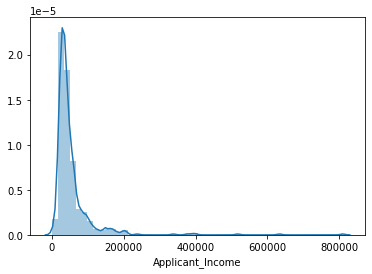

In [17]:
sns.distplot(df['Applicant_Income'])

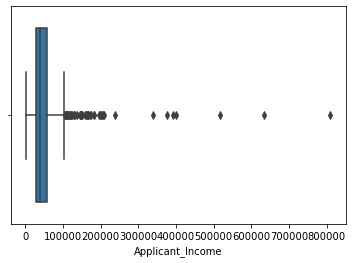

In [18]:
sns.boxplot(df['Applicant_Income'])

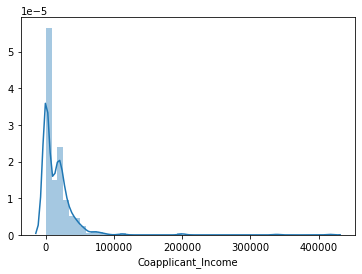

In [19]:
sns.distplot(df['Coapplicant_Income'])

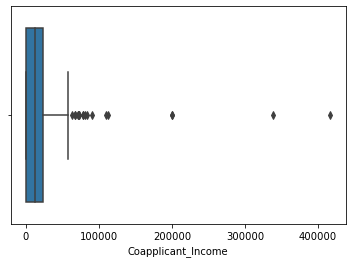

In [20]:
sns.boxplot(df['Coapplicant_Income'])

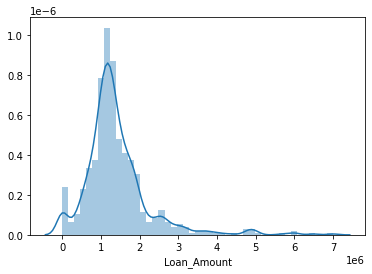

In [21]:
sns.distplot(df['Loan_Amount'])

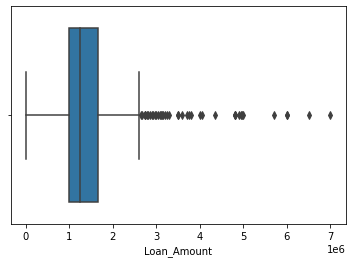

In [22]:
sns.boxplot(df['Loan_Amount'])

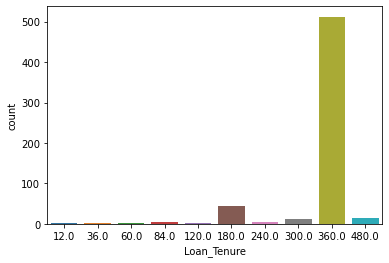

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Tenure, dtype: int64

In [23]:
sns.countplot(df['Loan_Tenure'])
plt.show()
df['Loan_Tenure'].value_counts()

#### From the above charts we can conclude that:

- We can see that most of the data in the distribution of applicant income, coapplicant income and loan amount are towards the left which means it is not normally distributed.
- Therefore we need no normalize it before creating our model.

### Bivariate Analysis:
### Comparing Independent Features with Target Feature

### Categorical Features

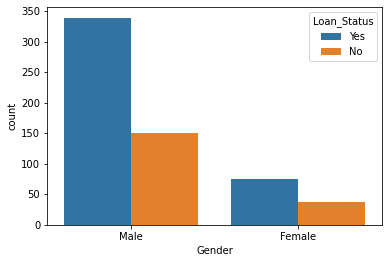

In [24]:
sns.countplot(x='Gender', hue='Loan_Status', data=df)

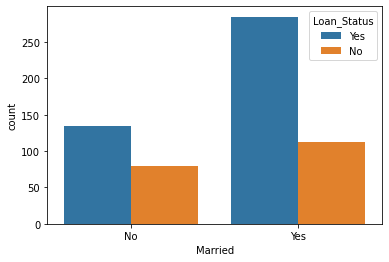

In [25]:
sns.countplot(x='Married', hue='Loan_Status', data=df)

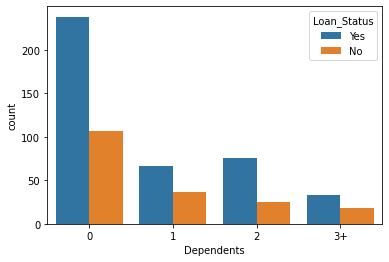

In [26]:
sns.countplot(x='Dependents', hue='Loan_Status', data=df)

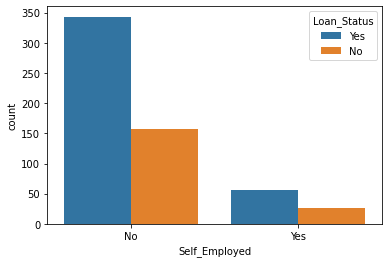

In [27]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)

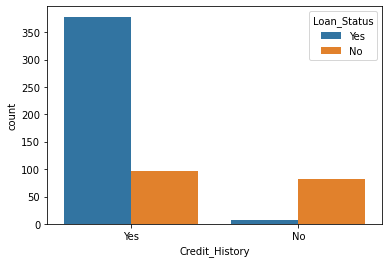

In [28]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)

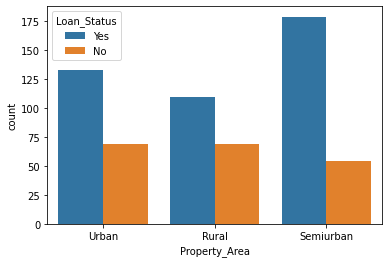

In [29]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)

#### From the above charts we can conclude that:

- The proportion of male and female applicants is more or less the same for both approved and unapproved loans.
- The proportion of married applicants is higher for approved loans.
- Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
- There is nothing significant we can infer from Self_Employed vs Loan_Status plot.
- It seems people with a credit history as 1 are more likely to get their loans approved.
- The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas.

### Numerical Features

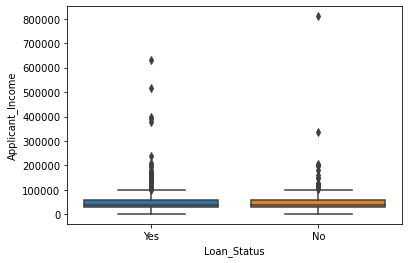

In [30]:
sns.boxplot(y='Applicant_Income',data=df,x='Loan_Status')

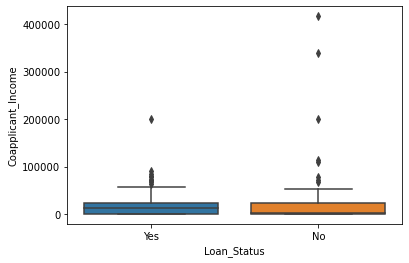

In [31]:
sns.boxplot(y='Coapplicant_Income',data=df,x='Loan_Status')

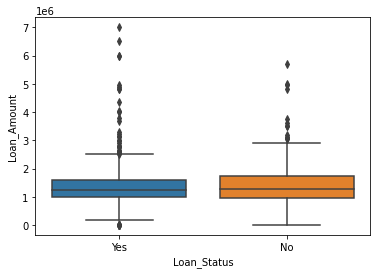

In [32]:
sns.boxplot(y='Loan_Amount',data=df,x='Loan_Status')

####  From the above charts we can say that:

- We cannot draw much conclusion from the above plots except that there are lot of outliers, therefore we will see correlation of the numerical features using heatmap

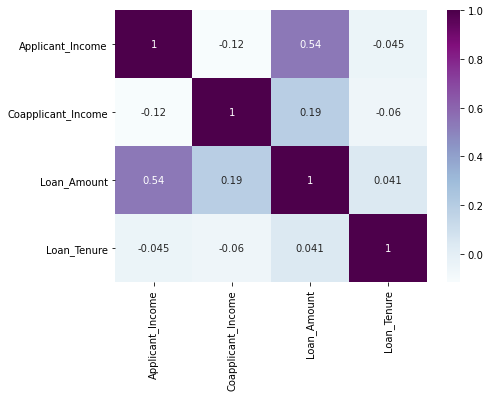

In [33]:
corr = df.corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='BuPu')

- We see that the most correlated features are Applicant_Income and Loan_Amount, Loan_Amount is also correlated with Coapplicant_Income.

### Preprocessing and Missing Value Imputation

In [34]:
df.isnull().sum().sort_values(ascending=False)

Credit_History        50
Self_Employed         32
Dependents            15
Loan_Tenure           14
Gender                13
Married                3
Loan_Status            0
Property_Area          0
Loan_Amount            0
Coapplicant_Income     0
Applicant_Income       0
Education              0
Loan_ID                0
dtype: int64

#### We can consider these methods to fill the missing values:
- For numerical variables: imputation using mean or median
- For categorical variables: imputation using mode

In [35]:
df['Coapplicant_Income'].replace(0,1,inplace=True)
df['Loan_Amount'].replace(0, df['Loan_Amount'].median(), inplace=True)
df['Loan_Tenure'].fillna(df['Loan_Tenure'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [36]:
df.isnull().sum().sort_values(ascending=False)

Loan_Status           0
Property_Area         0
Credit_History        0
Loan_Tenure           0
Loan_Amount           0
Coapplicant_Income    0
Applicant_Income      0
Self_Employed         0
Education             0
Dependents            0
Married               0
Gender                0
Loan_ID               0
dtype: int64

### Normalising Skewness

In [37]:
import numpy as np

In [38]:
df['Applicant_Income']=np.log(df['Applicant_Income'])

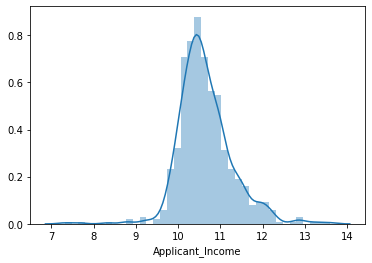

In [39]:
sns.distplot(df['Applicant_Income'])

In [40]:
df['Coapplicant_Income']=np.log(df['Coapplicant_Income'])

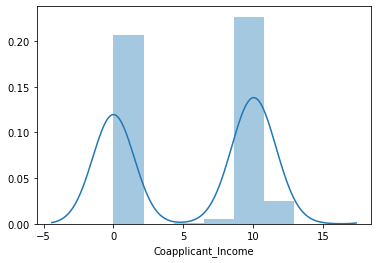

In [41]:
sns.distplot(df['Coapplicant_Income'])

In [42]:
df['Loan_Amount']=np.log(df['Loan_Amount'])

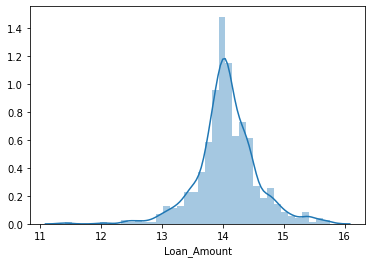

In [43]:
sns.distplot(df['Loan_Amount'])

In [44]:
df['Loan_Tenure']=np.log(df['Loan_Tenure'])

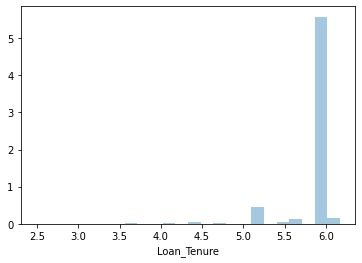

In [45]:
sns.distplot(df['Loan_Tenure'])

### Encoding our categorical data to numeric data manually

In [46]:
to_numeric = {'Male':1, 'Female':0,
              'Yes':1, 'No':0,
              'Graduate':1, 'Not Graduate':0,
              'Urban':2, 'Semiurban':1, 'Rural':0,
              '0':0,'1':1,'2':2, '3+':3}

df = df.applymap(lambda s: to_numeric.get(s) if s in to_numeric else s)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Tenure,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,10.976611,0.000000,14.038654,5.886104,1,2,1
1,LP001003,1,1,1,1,0,10.732694,9.621125,14.062371,5.886104,1,0,0
2,LP001005,1,1,0,1,1,10.308953,0.000000,13.399995,5.886104,1,2,1
3,LP001006,1,1,0,0,0,10.159292,10.068154,13.997832,5.886104,1,2,1
4,LP001008,1,0,0,1,0,11.002100,0.000000,14.159100,5.886104,1,2,1


### Dropping unwanted columns

In [47]:
df.drop("Loan_ID", axis=1, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Tenure,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,10.976611,0.000000,14.038654,5.886104,1,2,1
1,1,1,1,1,0,10.732694,9.621125,14.062371,5.886104,1,0,0
2,1,1,0,1,1,10.308953,0.000000,13.399995,5.886104,1,2,1
3,1,1,0,0,0,10.159292,10.068154,13.997832,5.886104,1,2,1
4,1,0,0,1,0,11.002100,0.000000,14.159100,5.886104,1,2,1


### Checking Correlation for all features

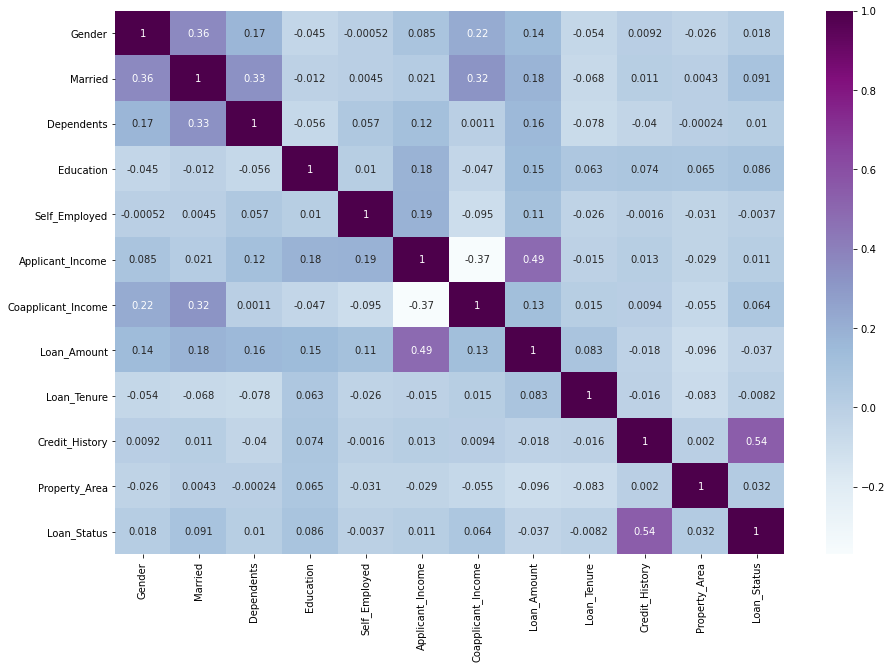

In [48]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='BuPu')

### Spliting model for training and testing

In [49]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score

### Creating a function to train and test our model together

In [51]:
def classification(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    model.fit(X_train, y_train)
    print("Accuracy:", model.score(X_test, y_test)*100)
    score= cross_val_score(model, X, y, cv=5)
    print("Cross Validation:", np.mean(score)*100)
    y_pred = model.predict(X_test)
    print("F1 score:", f1_score(y_test, y_pred))

### Validating with various models to pick the best prediction and accuracy

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classification(model, X, y)

Accuracy: 80.48780487804879
Cross Validation: 80.9462881514061
F1 score: 0.8736842105263158


In [53]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classification(model, X, y)

Accuracy: 69.10569105691057
Cross Validation: 72.80154604824737
F1 score: 0.7682926829268292


In [54]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()
classification(model, X, y)

Accuracy: 76.42276422764228
Cross Validation: 78.82846861255499
F1 score: 0.8432432432432432


In [55]:
model = ExtraTreesClassifier()
classification(model, X, y)

Accuracy: 73.17073170731707
Cross Validation: 78.1713981074237
F1 score: 0.8135593220338982


In [56]:
model = RandomForestClassifier(n_estimators= 100, min_samples_split=25, max_depth=7, max_features=1)
classification(model, X, y)

Accuracy: 79.67479674796748
Cross Validation: 80.45848327335733
F1 score: 0.8691099476439791
